pendências
- [x] Procurar sobre importância de atributos
- [x] Calcular acurácia dos modelos
- [x] Fazer previsão por liga

# Imports e carregamentos

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_live_engineer_filtered.csv', encoding='utf-8')

In [3]:
df.columns

Index(['minute', 'homeTeam', 'awayTeam', 'shotsHome', 'shotsAway', 'league',
       'shotsOffgoal_home', 'shotsOffgoal_away', 'fouls_home', 'fouls_away',
       'tackles_home', 'tackles_away', 'result', 'match_id',
       'possessiontime_away', 'possessiontime_home', 'shotsOnGoalEfficiency',
       'attackPressure', 'shotAccuracy_home', 'shotAccuracy_away',
       'possessionControl', 'passRiskHome', 'passRiskAway',
       'defensiveDiscipline', 'defensiveEfficacy', 'defensiveAggression',
       'timeSinceLastEventShots_Home', 'timeSinceLastEventShots_Away',
       'timeSinceLastEventCorners_Home', 'timeSinceLastEventCorners_Away',
       'timeSinceLastEventPasses_Home', 'timeSinceLastEventPasses_Away',
       'timeSinceLastEvent_Home', 'timeSinceLastEvent_Away',
       'timeSinceLastEventFouls_Home', 'timeSinceLastEventFouls_Away',
       'timeSinceLastEventTotalCards_Home',
       'timeSinceLastEventTotalCards_Away', 'total_change_possessiontime_home',
       'total_change_possession

## Preprocessamento

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle

# Função para separar os dados em características e variável alvo
def prepare_data(df):
    X = df.drop(columns=['result', 'homeTeam', 'awayTeam', 'match_id'])
    y = df['result']
    print("Dados separados em características (X) e variável alvo (y).")
    return X, y

# Função para criar e aplicar o transformador de colunas
def create_preprocessor(X):
    numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()
    categorical_features = ['league']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ])
    
    print("Preprocessador criado com transformações para características numéricas e categóricas.")
    return preprocessor.fit(X)

# # Preparando os dados
X, y = prepare_data(df)
preprocessor = create_preprocessor(X)
print("Preprocessador ajustado aos dados.")

# Salvando o preprocessador para uso futuro
with open('../models/preprocessor.pickle', 'wb') as f:
    pickle.dump(preprocessor, f)
    print("Preprocessador salvo em '../models/preprocessor.pickle'.")

# Dividindo os dados em conjuntos de treino e teste
X_transformed = preprocessor.transform(X)
print("Dados transformados pelo preprocessador.")

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=42, stratify=y)
print("Dados divididos em conjuntos de treino e teste.")

Dados separados em características (X) e variável alvo (y).
Preprocessador criado com transformações para características numéricas e categóricas.
Preprocessador ajustado aos dados.
Preprocessador salvo em '../models/preprocessor.pickle'.
Dados transformados pelo preprocessador.
Dados divididos em conjuntos de treino e teste.


## Rede Neural: Treinamento e Avaliação 

In [5]:
X_train.shape[1]

79

In [6]:
# import torch
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Usando dispositivo: {device}")

In [7]:
# from torch.cuda.amp import GradScaler, autocast
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from torch.utils.data import Dataset, DataLoader

# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, neurons, dropout_rate, activation_type, normalization_type):
#         super(NeuralNetwork, self).__init__()
#         layers = []


#         # Primeira camada
#         layers.append(nn.Linear(input_size, neurons[0]))
#         if normalization_type == 'batch':
#             layers.append(nn.BatchNorm1d(neurons[0]))
#         layers.append(self._get_activation(activation_type))
#         if dropout_rate > 0:
#             layers.append(nn.Dropout(dropout_rate))

#         # Camadas ocultas
#         for i in range(1, len(neurons)):
#             layers.append(nn.Linear(neurons[i-1], neurons[i]))
#             if normalization_type == 'batch':
#                 layers.append(nn.BatchNorm1d(neurons[i]))
#             layers.append(self._get_activation(activation_type))
#             if dropout_rate > 0:
#                 layers.append(nn.Dropout(dropout_rate))


#         # Camada de saída
#         self.layers = nn.Sequential(*layers)
#         self.output = nn.Linear(neurons[-1], 1)
#         self.sigmoid = nn.Sigmoid()

#     def _get_activation(self, activation_type):
#         if activation_type == 'relu':
#             return nn.ReLU()
#         elif activation_type == 'tanh':
#             return nn.Tanh()
#         elif activation_type == 'leaky_relu':
#             return nn.LeakyReLU()
#         elif activation_type == 'elu':
#             return nn.ELU()
#         # Adicione outras funções de ativação conforme necessário
#         else:
#             raise ValueError(f"Tipo de ativação desconhecido: {activation_type}")

#     def forward(self, x):
#         x = self.layers(x)
#         x = self.output(x)
#         x = self.sigmoid(x)
#         return x

# patience = 10
# def train(model, criterion, optimizer, train_loader, val_loader, epochs=400):
#     model.train()
#     best_loss = float('inf')
#     epochs_no_improve = 0

#     for epoch in range(epochs):
#           for i, (inputs, labels) in enumerate(train_loader):
#               inputs, labels = inputs.to(device), labels.to(device)
#               optimizer.zero_grad()
#               outputs = model(inputs)
#               loss = criterion(outputs, labels.unsqueeze(1))
#               loss.backward()
#               optimizer.step()

#           # Avaliação no conjunto de validação
#           model.eval()
#           with torch.no_grad():
#               val_losses = []
#               for inputs, labels in val_loader:
#                   inputs, labels = inputs.to(device), labels.to(device)
#                   outputs = model(inputs)
#                   val_loss = criterion(outputs, labels.unsqueeze(1))
#                   val_losses.append(val_loss.item())

#               avg_val_loss = np.mean(val_losses)
#               print(f'Época {epoch+1}/{epochs}, Perda de Treinamento: {loss.item()}, Perda de Validação: {avg_val_loss}, Melhor perda: {best_loss}')

#               # Salvar os melhores pesos do modelo
#               if avg_val_loss < best_loss:
#                   print('Melhor perda de validação alcançada, salvando o modelo...')
#                   best_loss = avg_val_loss
#                   torch.save(model.state_dict(), f'../models/model_redeht.pth')
#                   epochs_no_improve = 0
#               else:
#                   epochs_no_improve += 1
#                   if epochs_no_improve == patience:
#                       print('Early stopping!')
#                       break

#     # Carrega os melhores pesos antes de retornar (opcional)
#     model.load_state_dict(torch.load(f'../models/model_redeht.pth'))

# class CustomDataset(Dataset):
#     def __init__(self, X, y):
#         self.X = torch.tensor(X, dtype=torch.float32)
#         self.y = torch.tensor(y, dtype=torch.float32)

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     total_loss = 0
#     total_accuracy = 0
#     total_samples = 0

#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             loss = criterion(outputs, labels.unsqueeze(1))
#             total_loss += loss.item()
#             preds = (outputs > 0.5).float()
#             total_accuracy += (preds.squeeze() == labels).float().sum().item()
#             total_samples += labels.size(0)

#     avg_loss = total_loss / len(data_loader)
#     avg_accuracy = total_accuracy / total_samples
#     return avg_loss, avg_accuracy


In [8]:
# def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, epochs=400):
#   # Seu código de treinamento e avaliação aqui
#   train(model, criterion, optimizer, train_loader, val_loader, epochs=epochs)
#   loss, accuracy = evaluate(model, val_loader, criterion)
#   # Retorna a perda média no conjunto de validação
#   return loss

# # Espaço de Hiperparâmetros
# param_grid = {
#     'learning_rate': [0.00001, 0.00001, 0.000001],
#     'batch_size': [64, 128, 256, 1024],
#     'num_layers': [2, 3, 4],  # Por exemplo, entre 2 e 4 camadas
#     'max_neurons': 1024,  # Número máximo de neurônios em uma camada
#     # 'dropout_rate': [0.3, 0.4, 0.5, 0.6],
#     'dropout_rate': [0], # sem dropout para ajustas após a escolha dos melhores parâmetros
#     'activation_type': ['relu', 'leaky_relu'],
#     # 'activation_type': ['relu'],
#     'normalization_type': ['none']  # 'none' indica sem normalização
#     # 'normalization_type': ['none'] # deixar o ajuste de normalização para diminuir overfitting após a escolha dos melhores parâmetros

# }

# # Random Search
# n_iterations = 50
# best_loss = float('inf')
# best_params = None
# input_size = X_train.shape[1]
# criterion = nn.BCELoss().to(device)

# # Divisão dos dados de treinamento e validação
# X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Gera uma lista de números de neurônios aleatórios e depois ordena em ordem decrescente
# # Em geral, redes com uma ordem decrescente de neurônios (mais neurônios nas primeiras camadas e menos nas últimas) são comuns, pois isso pode ajudar a rede a capturar progressivamente características mais abstratas dos dados
# def generate_neuron_configuration(num_layers, max_neurons):
#     neuron_counts = np.random.randint(100, max_neurons, size=num_layers)
#     neuron_counts.sort()  # Ordena em ordem crescente
#     return tuple(neuron_counts[::-1])  # Inverte para ordem decrescente

In [9]:
# for i in range(n_iterations):
#     # Escolha aleatória dos hiperparâmetros
#     lr = np.random.choice(param_grid['learning_rate'])
#     batch_size = np.random.choice(param_grid['batch_size'])
#     num_layers = np.random.choice(param_grid['num_layers'])
#     neurons = generate_neuron_configuration(num_layers, param_grid['max_neurons'])
#     dropout_rate = np.random.choice(param_grid['dropout_rate'])
#     activation_type = np.random.choice(param_grid['activation_type'])
#     normalization_type = np.random.choice(param_grid['normalization_type'])


#     print(f"Iteração {i} LR={lr}, batch_size={batch_size}, num_layers={num_layers}, neurons: {neurons}  dropout_rate: {dropout_rate}  activation_type: {activation_type} normalization_type: {normalization_type}")

#     train_dataset = CustomDataset(X_train_new.tolist(), y_train_new.tolist())
#     val_dataset = CustomDataset(X_val.tolist(), y_val.tolist())

#     train_loader = DataLoader(dataset=train_dataset, batch_size=int(batch_size), shuffle=True)
#     val_loader = DataLoader(dataset=val_dataset, batch_size=int(batch_size))

#     # Criar modelo, otimizador e dataloaders
#     model = NeuralNetwork(input_size, neurons, dropout_rate, activation_type, normalization_type).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=lr)
#     train_loader = DataLoader(dataset=train_dataset, batch_size=int(batch_size), shuffle=True)
#     val_loader = DataLoader(dataset=val_dataset, batch_size=int(batch_size))

#     # Treinar e avaliar
#     val_loss = train_and_evaluate(model, optimizer, criterion, train_loader, val_loader)

#     # Checar se é o melhor modelo
#     if val_loss < best_loss:
#         best_loss = val_loss
#         best_params = (lr, batch_size, num_layers, neurons, dropout_rate, activation_type, normalization_type)

#     print(f'Melhor Perda de Validação: {best_loss}')
#     print(f'Melhores Hiperparâmetros: LR={best_params[0]}, batch_size={best_params[1]}, num_layers={best_params[2]}, neurons: {best_params[3]}  dropout_rate: {best_params[4]}  activation_type: {best_params[5]} normalization_type: {best_params[6]}')

# print(f'Melhor Perda de Validação: {best_loss}')
# print(f'Melhores Hiperparâmetros: LR={best_params[0]}, batch_size={best_params[1]}, num_layers={best_params[2]}, neurons: {best_params[3]}  dropout_rate: {best_params[4]}  activation_type: {best_params[5]} normalization_type: {best_params[6]}')


In [10]:
# Xht = df.drop(columns=['result', 'homeTeam', 'awayTeam', 'match_id']).head(1699).tail(1)
# Xht = preprocessor.transform(Xht)
# yht = df['result'].head(1699).tail(1)
# yht

In [11]:
# df_jogos = []
# Xht = df.drop(columns=['result', 'homeTeam', 'awayTeam', 'match_id']).head(1699).tail(1)

In [12]:
# df_jogos.append(Xht)

In [13]:
# pd.concat(df_jogos, axis=0)

In [14]:
# # 3. Preparar dados de entrada
# # Suponha que 'novo_dado' seja o seu novo dado de entrada que você quer prever
# # Deve ser processado da mesma forma que os dados de treinamento foram processados
# # novo_dado = torch.tensor(novo_dado, dtype=torch.float32)
# novo_dado = torch.tensor(Xht, dtype=torch.float32)

# # 4. Fazer previsões
# with torch.no_grad():
#     previsao = model(novo_dado)
# previsao[0][0]

In [15]:
# previsao[0][0] > 0

In [16]:
# import joblib
# # carregar o modelo
# model = joblib.load('../models/modelo_mlp.pkl')
# # Fazendo as predições no conjunto de teste
# predictions = model.predict(Xht)
# predictions

In [17]:
from keras.layers import Dense, Dropout, LayerNormalization, Activation, BatchNormalization, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import roc_auc_score
from keras.regularizers import l2, l1_l2
import tensorflow as tf  # Import the l2 regularizer
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import confusion_matrix
import seaborn as sns

model = Sequential()
model.add(Dense(1280, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(640, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(320, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Ajustando o otimizador
optimizer = Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', tf.metrics.Recall(), tf.metrics.Precision(), tf.metrics.AUC()])

# Ajustando os callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Iniciando o treinamento
history = model.fit(X_train, y_train, epochs=400, batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr], verbose=1)


# Fazendo as predições no conjunto de teste
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0).flatten()  # Converter para 0s e 1s e achatar o array

# avaliando o modelo com os dados de treino
loss, accuracy, recall, precision, auc = model.evaluate(X_train, y_train, verbose=0)

# Imprimindo as métricas de treino
print(f'Treino de perda: {loss}')
print(f'Treino de acurácia: {accuracy}')
print(f'Treino de recall: {recall}')
print(f'Treino de precisão: {precision}')
print(f'Treino de AUC: {auc}')

# avaliando o modelo com os dados de teste
loss, accuracy, recall, precision, auc = model.evaluate(X_test, y_test, verbose=0)

# Imprimindo as métricas de teste
print(f'Teste de perda: {loss}')
print(f'Teste de acurácia: {accuracy}')
print(f'Teste de recall: {recall}')
print(f'Teste de precisão: {precision}')
print(f'Teste de AUC: {auc}')



# Gerando predições com o conjunto de teste
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Converter para 0s e 1s

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiros')
plt.xlabel('Predições')
plt.show()

# Gerando o relatório de classificação
report = classification_report(y_test, predictions, target_names=['Classe 0', 'Classe 1'])

# Imprimindo o relatório de classificação
print("Relatório de Classificação:")
print(report)

# Plotando a curva de aprendizado
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curva de Aprendizado do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

# Salvando o modelo
model.save('../models/model_redeht.h5')

Epoch 1/400
1953/1953 [==============================] - 41s 20ms/step - loss: 0.8608 - accuracy: 0.5231 - recall: 0.5232 - precision: 0.5230 - auc: 0.5320 - val_loss: 0.6772 - val_accuracy: 0.5664 - val_recall: 0.5026 - val_precision: 0.5763 - val_auc: 0.6012 - lr: 1.0000e-04
Epoch 2/400
1953/1953 [==============================] - 39s 20ms/step - loss: 0.7403 - accuracy: 0.5393 - recall: 0.5424 - precision: 0.5390 - auc: 0.5549 - val_loss: 0.6688 - val_accuracy: 0.5838 - val_recall: 0.6309 - val_precision: 0.5768 - val_auc: 0.6185 - lr: 1.0000e-04
Epoch 3/400
1953/1953 [==============================] - 36s 19ms/step - loss: 0.6986 - accuracy: 0.5517 - recall: 0.5653 - precision: 0.5503 - auc: 0.5742 - val_loss: 0.6670 - val_accuracy: 0.5905 - val_recall: 0.6273 - val_precision: 0.5845 - val_auc: 0.6255 - lr: 1.0000e-04
Epoch 4/400
1953/1953 [==============================] - 37s 19ms/step - loss: 0.6813 - accuracy: 0.5665 - recall: 0.5907 - precision: 0.5634 - auc: 0.5934 - val_loss

KeyboardInterrupt: 

In [ ]:
# from keras import regularizers

# from kerastuner import HyperModel, RandomSearch

# class MyHyperModel(HyperModel):
#     def __init__(self, input_shape):
#         self.input_shape = input_shape

#     def build(self, hp):
#         model = Sequential()
#         model.add(Dense(units=hp.Int('units', min_value=512, max_value=2048, step=512),
#                         activation='relu', input_shape=self.input_shape,
#                         kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-5, 1e-2, sampling='log'))))
#         model.add(BatchNormalization())
#         model.add(Dropout(hp.Float('dropout', 0.3, 0.5, step=0.1)))
#         model.add(Dense(1, activation='sigmoid'))
        
#         model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
#                       loss='binary_crossentropy',
#                       metrics=['accuracy', tf.metrics.Recall(), tf.metrics.Precision(), tf.metrics.AUC()])
#         return model

# hypermodel = MyHyperModel(input_shape=(X_train.shape[1],))

# tuner = RandomSearch(
#     hypermodel,
#     objective='val_accuracy',  # ou 'val_loss', 'val_accuracy', etc.
#     max_trials=10,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='hparam_tuning'
# )

# tuner.search(X_train, y_train,
#              epochs=50,
#              validation_split=0.2,
#              callbacks=[reduce_lr, early_stop])

Trial 10 Complete [00h 05m 28s]
val_accuracy: 0.6181989312171936

Best val_accuracy So Far: 0.7631000876426697
Total elapsed time: 00h 51m 23s


In [ ]:
# # Obter o melhor conjunto de hiperparâmetros
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Você pode acessar os hiperparâmetros diretamente pelo nome
# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}. The optimal dropout rate is {best_hps.get('dropout')} and the optimal l2 regularization is {best_hps.get('l2')}.

# """)

# # Obter o melhor modelo
# best_model = tuner.get_best_models(num_models=1)[0]

# # Avaliar o melhor modelo
# loss, accuracy, recall, precision, auc = best_model.evaluate(X_test, y_test)

# print(f"Loss: {loss}, Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, AUC: {auc}")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 1024 and the optimal learning rate for the optimizer
is 0.0002472161416221352. The optimal dropout rate is 0.3 and the optimal l2 regularization is 3.1323535509142155e-05.


623/623 [==============================] - 1s 1ms/step - loss: 0.5319 - accuracy: 0.7612 - recall: 0.8155 - precision: 0.7356 - auc: 0.8344
Loss: 0.5318855047225952, Accuracy: 0.7612209916114807, Recall: 0.8155437111854553, Precision: 0.7356217503547668, AUC: 0.8344180583953857


623/623 [==============================] - 1s 852us/step
Teste de perda: 0.5318855047225952
Teste de acurácia: 0.7612209916114807
Teste de recall: 0.8155437111854553
Teste de precisão: 0.7356217503547668
Teste de AUC: 0.8344180583953857
623/623 [==============================] - 2s 2ms/step


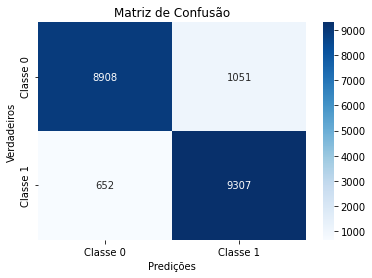

Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 0       0.93      0.89      0.91      9959
    Classe 1       0.90      0.93      0.92      9959

    accuracy                           0.91     19918
   macro avg       0.92      0.91      0.91     19918
weighted avg       0.92      0.91      0.91     19918



In [ ]:
# predictions = best_model.predict(X_test)
# predictions = np.where(predictions > 0.5, 1, 0).flatten()  # Converter para 0s e 1s e achatar o array

# # Imprimindo as métricas de teste
# print(f'Teste de perda: {loss}')
# print(f'Teste de acurácia: {accuracy}')
# print(f'Teste de recall: {recall}')
# print(f'Teste de precisão: {precision}')
# print(f'Teste de AUC: {auc}')

# # Gerando predições com o conjunto de teste
# predictions = model.predict(X_test)
# predictions = (predictions > 0.5).astype(int)  # Converter para 0s e 1s

# # Matriz de confusão
# cm = confusion_matrix(y_test, predictions)
# plt.figure()
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
# plt.title('Matriz de Confusão')
# plt.ylabel('Verdadeiros')
# plt.xlabel('Predições')
# plt.show()

# # Gerando o relatório de classificação
# report = classification_report(y_test, predictions, target_names=['Classe 0', 'Classe 1'])

# # Imprimindo o relatório de classificação
# print("Relatório de Classificação:")
# print(report)

Curva de Aprendizado: A curva de aprendizado mostra que a acurácia de validação e treinamento estão se aproximando uma da outra conforme o número de épocas aumenta, o que é um bom sinal de que o modelo não está sofrendo de overfitting significativo.

Acurácia e AUC: A acurácia e a Área Sob a Curva ROC (AUC) no conjunto de teste são bastante altas, o que sugere que o modelo tem um bom desempenho geral.

Recall e Precision: Os valores de recall e precisão são bastante equilibrados para as previsões no conjunto de validação, indicando que o modelo tem um desempenho bom e equilibrado em relação a ambas as classes.

Relatório de Classificação: O relatório de classificação mostra resultados quase simétricos para as classes 0 e 1, com uma precisão, recall e pontuação F1 bastante semelhantes para ambas, o que sugere que o modelo está tratando ambas as classes de forma equitativa.

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from keras.models import load_model

# # Carregar o modelo
# model = load_model('../models/model_redeht.h5')

# # Prever as probabilidades para o conjunto de teste
# y_probs = model.predict(X_test)

# # Inicialize o valor do threshold que você quer testar
# thresholds = np.arange(0.1, 0.9, 0.01)

# # Para cada threshold, calcule e imprima as métricas
# for thresh in thresholds:
#     # Converta probabilidades em previsões binárias com base no threshold
#     y_pred = (y_probs >= thresh).astype(int)
    
#     # Calcule as métricas para a classe 1
#     precision = precision_score(y_test, y_pred, pos_label=1)
#     recall = recall_score(y_test, y_pred, pos_label=1)
#     f1 = f1_score(y_test, y_pred, pos_label=1)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     # Imprima as métricas
#     print(f'Threshold: {thresh:.2f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}, Accuracy: {accuracy:.3f}')

# # Escolha o threshold que oferece o melhor equilíbrio entre as métricas que são importantes para o seu caso de uso


623/623 [==============================] - 2s 3ms/step
Threshold: 0.10, Precision: 0.787, Recall: 0.982, F1 Score: 0.874, Accuracy: 0.858
Threshold: 0.11, Precision: 0.793, Recall: 0.981, F1 Score: 0.877, Accuracy: 0.862
Threshold: 0.12, Precision: 0.798, Recall: 0.979, F1 Score: 0.879, Accuracy: 0.866
Threshold: 0.13, Precision: 0.803, Recall: 0.978, F1 Score: 0.882, Accuracy: 0.869
Threshold: 0.14, Precision: 0.807, Recall: 0.977, F1 Score: 0.884, Accuracy: 0.872
Threshold: 0.15, Precision: 0.811, Recall: 0.976, F1 Score: 0.886, Accuracy: 0.874
Threshold: 0.16, Precision: 0.815, Recall: 0.975, F1 Score: 0.888, Accuracy: 0.877
Threshold: 0.17, Precision: 0.820, Recall: 0.974, F1 Score: 0.890, Accuracy: 0.880
Threshold: 0.18, Precision: 0.824, Recall: 0.972, F1 Score: 0.892, Accuracy: 0.882
Threshold: 0.19, Precision: 0.828, Recall: 0.971, F1 Score: 0.894, Accuracy: 0.885
Threshold: 0.20, Precision: 0.832, Recall: 0.970, F1 Score: 0.896, Accuracy: 0.887
Threshold: 0.21, Precision: 0.83

## Visualizando características importantes

In [ ]:
# from keras.models import load_model
# model = load_model('../models/model_redeht_final.h5')

# import shap
# # Criando o explainer
# explainer = shap.DeepExplainer(model, X_train)
# # Subconjunto do conjunto de teste para análise
# X_test_sample = X_test[:200]  # Ajuste o tamanho da amostra conforme necessário

# # Calculando os valores SHAP
# shap_values = explainer.shap_values(X_test_sample)
# # Plotando um gráfico de resumo
# # shap.summary_plot(shap_values, X_test_sample)

# # Obter os nomes das colunas numéricas
# numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()

# # Obter os nomes das colunas após a transformação
# # Para as características numéricas, permanecem os mesmos
# transformed_numeric_features = numeric_features

# # Como só tem uma característica categórica:
# categories = preprocessor.named_transformers_['cat'].categories_
# transformed_categorical_features = [
#     f'league_{category}' for category in categories[0][1:]  # drop='first' remove a primeira categoria
# ]

# # Combina os dois
# all_transformed_features = transformed_numeric_features + transformed_categorical_features

In [ ]:
# # Plotando um gráfico de resumo com nomes de features reais
# shap.summary_plot(shap_values, features=X_test_sample, feature_names=all_transformed_features, max_display=X_test_sample.shape[1])